In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드  8대2로 나누기, 순환 데이터 만든 후에 해도 됨
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine-learning-practice/Machine-Learning-Programming/week9/data/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [3]:
# 2. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
# 3. 시퀀스 데이터 생성
window = 12   # 최근 12개월 데이터로 다음 달 예측
X, y = [], []
for i in range(len(data_scaled) - window):
    X.append(data_scaled[i:i+window])
    y.append(data_scaled[i+window])

X, y = np.array(X), np.array(y)

In [5]:
# 4. Train / Test 데이터 분리
train_size = int(len(y) * 0.8)
rnn_train_X = np.array(X[0 : train_size])
rnn_train_y = np.array(y[0 : train_size])

test_size = len(y) - train_size
rnn_test_X = np.array(X[train_size : len(X)])
rnn_test_y = np.array(y[train_size : len(y)])

print('훈련 데이터의 크기 :', rnn_train_X.shape, rnn_train_y.shape)
print('테스트 데이터의 크기 :', rnn_test_X.shape, rnn_test_y.shape)

훈련 데이터의 크기 : (250, 12, 1) (250, 1)
테스트 데이터의 크기 : (63, 12, 1) (63, 1)


In [6]:
# --- SimpleRNN 모델 ---

## 5. RNN 모델 구성
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window, 1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 12, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
## 6. RNN 모델 학습
rnn_model.fit(rnn_train_X, rnn_train_y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0295
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010    
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.2536e-04
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5611e-04
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
E

In [8]:
## 7. RNN 모델 평가 및 예측
pred_rnn = rnn_model.predict(rnn_test_X)
mse_rnn = mean_squared_error(rnn_test_y, pred_rnn)
print(f"RNN Model Test MSE: {mse_rnn}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
RNN Model Test MSE: 0.0031243594859504988


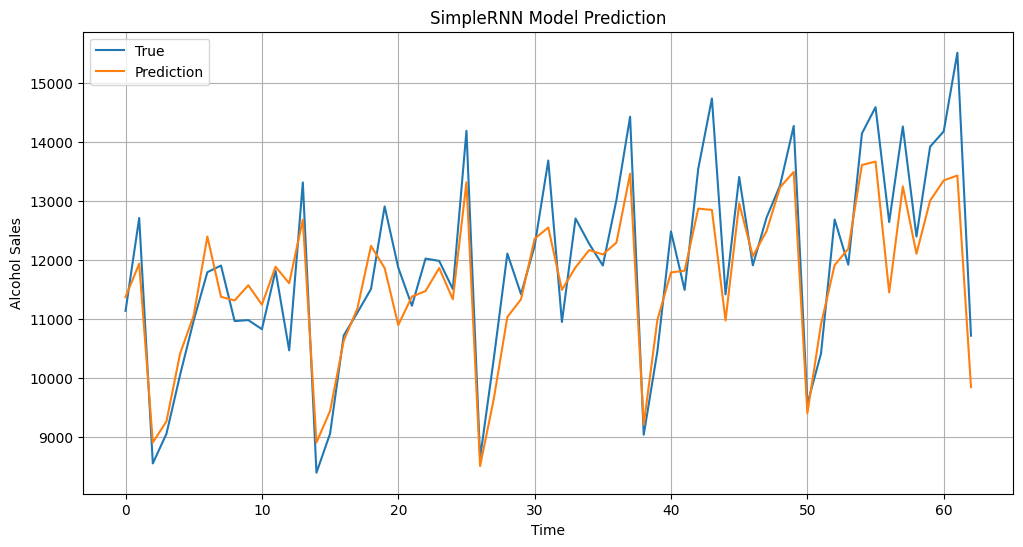

In [10]:
## 8. RNN 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('SimpleRNN Model Prediction')
plt.plot(scaler.inverse_transform(rnn_test_y), label='True')
plt.plot(scaler.inverse_transform(pred_rnn), label='Prediction')
plt.xlabel('Time')
plt.ylabel('Alcohol Sales')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# --- LSTM 모델 ---

# 9. Train / Test 데이터 분리
train_size = int(len(y) * 0.8)
lstm_train_X = np.array(X[0 : train_size])
lstm_train_y = np.array(y[0 : train_size])

test_size = len(y) - train_size
lstm_test_X = np.array(X[train_size : len(X)])
lstm_test_y = np.array(y[train_size : len(y)])

print('훈련 데이터의 크기 :', lstm_train_X.shape, lstm_train_y.shape)
print('테스트 데이터의 크기 :',lstm_test_X.shape, lstm_test_y.shape)

훈련 데이터의 크기 : (250, 12, 1) (250, 1)
테스트 데이터의 크기 : (63, 12, 1) (63, 1)


In [12]:
## 10. LSTM 모델 구성
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
## 11. LSTM 모델 학습
lstm_model.fit(lstm_train_X, lstm_train_y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0827
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0049
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039
Epoch 16/50
32/32

In [14]:
## 12. LSTM 모델 평가 및 예측
pred_lstm = lstm_model.predict(lstm_test_X)
mse_lstm = mean_squared_error(lstm_test_y, pred_lstm)
print(f"LSTM Model Test MSE: {mse_lstm}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
LSTM Model Test MSE: 0.018158049883422994


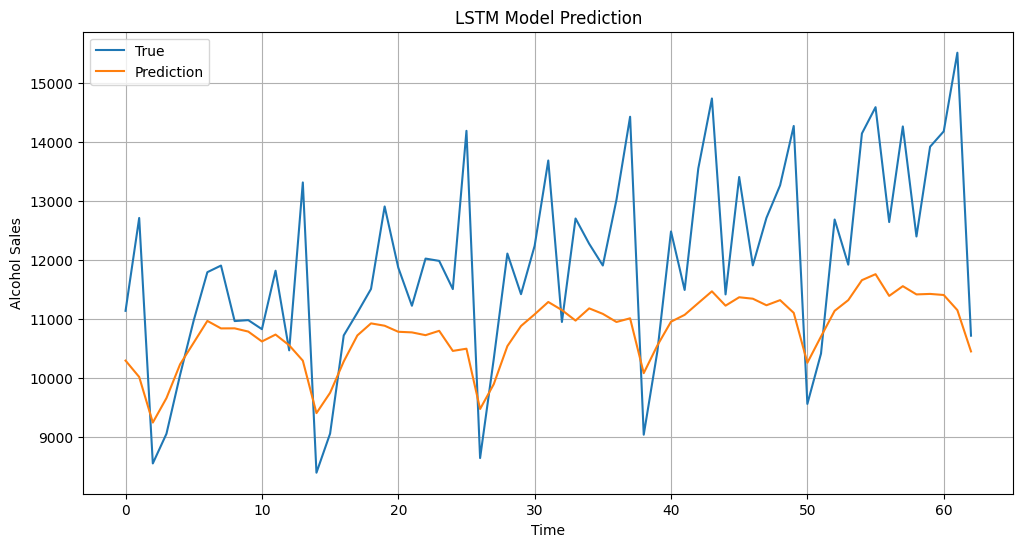

In [15]:
## 13. LSTM 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('LSTM Model Prediction')
plt.plot(scaler.inverse_transform(lstm_test_y), label='True')
plt.plot(scaler.inverse_transform(pred_lstm), label='Prediction')
plt.xlabel('Time')
plt.ylabel('Alcohol Sales')
plt.legend()
plt.grid(True)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


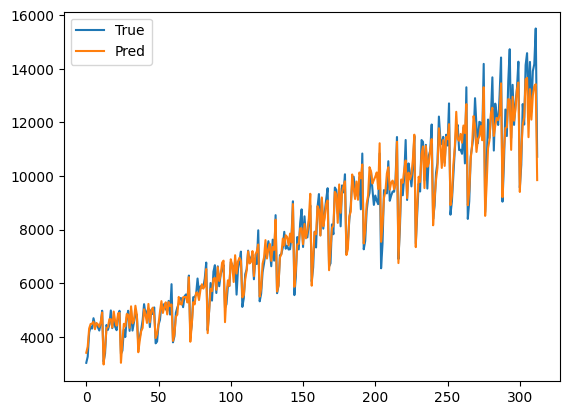

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


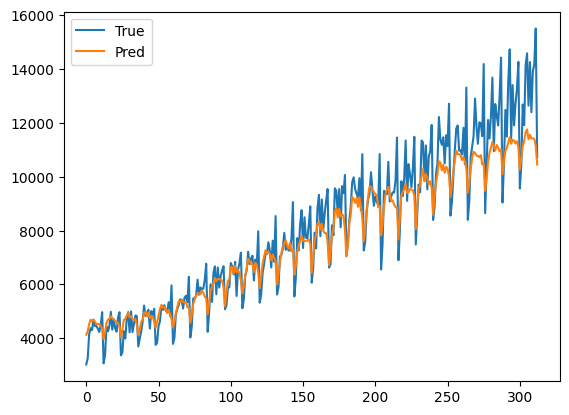

In [17]:
# 14. 예측
pred_rnn = rnn_model.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred_rnn), label='Pred')
plt.legend(); plt.show()

pred_lstm = lstm_model.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred_lstm), label='Pred')
plt.legend(); plt.show()